In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#EDA(EXPLOTARY DATA ANLYSIS)
#MISSING DATA
path="/content/drive/MyDrive/dailytemperature.csv"
df=pd.read_csv(path,index_col=0,parse_dates=True)

In [3]:
df.info

<bound method DataFrame.info of             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]>

In [4]:
#checking for null values(no null values)
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of              Temp
Date             
1981-01-01  False
1981-01-02  False
1981-01-03  False
1981-01-04  False
1981-01-05  False
...           ...
1990-12-27  False
1990-12-28  False
1990-12-29  False
1990-12-30  False
1990-12-31  False

[3650 rows x 1 columns]>

In [5]:
df['Temp'].unique()

array([20.7, 17.9, 18.8, 14.6, 15.8, 17.4, 21.8, 20. , 16.2, 13.3, 16.7,
       21.5, 25. , 20.6, 24.8, 17.7, 15.5, 18.2, 12.1, 14.4, 16. , 16.5,
       18.7, 19.4, 17.2, 15.1, 15.4, 15.3, 21.9, 19.9, 16.6, 16.8, 17.1,
       15. , 13.7, 13.9, 18.3, 22. , 22.1, 21.2, 18.4, 16.1, 15.7, 18.5,
       16.9, 17.5, 17.8, 18.6, 17. , 14.3, 11.4, 16.3, 11.8, 12.2, 14.7,
       11.3, 10.6, 11.7, 14.2, 11.2,  8.1,  8. ,  8.8, 13.4, 10.9, 11. ,
       14.5, 18.1, 10. , 14.9, 15.9, 13. ,  7.6, 11.5, 13.5, 12.4, 13.2,
       13.8,  9. ,  9.8,  8.9,  7.4,  9.9,  9.3,  8.6, 11.9, 14. , 12. ,
       10.5, 10.7, 10.1,  5.3,  6.6,  8.5,  5.9,  3.2,  2.1,  3.4,  5.4,
        9.6, 12.3, 12.6, 12.8, 11.6,  5.7,  7.1,  2.5,  3.5,  4.6,  7.7,
       10.4,  9.2,  6.1,  2.7,  4.3,  6.3,  3.8,  4.4,  4.8,  5.8,  6.2,
        7.3, 10.2,  9.5,  6.5,  7. ,  8.3,  6.8,  7.2,  5. ,  6.9,  5.2,
        3. ,  5.6,  7.9, 10.3,  9.7, 12.5,  3.9,  6. ,  5.5,  7.5,  7.8,
       14.1, 12.9,  9.1,  8.4, 13.6,  9.4, 14.8, 16

In [6]:
#we have incositency data of['?0.2','?0.8','?0.1']] so replace with ['0.2','0.8','0.1']
df['Temp']=df['Temp'].replace(to_replace=['?0.2','?0.8','?0.1'],value=['0.2','0.8','0.1'])
df['Temp'].value_counts()

10.0    51
11.0    51
13.0    48
12.5    44
10.5    44
        ..
0.2      1
24.0     1
25.2     1
22.7     1
21.6     1
Name: Temp, Length: 229, dtype: int64

In [7]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


<ipython-input-8-fc2ab744df46>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temp'])


<Axes: xlabel='Temp', ylabel='Density'>

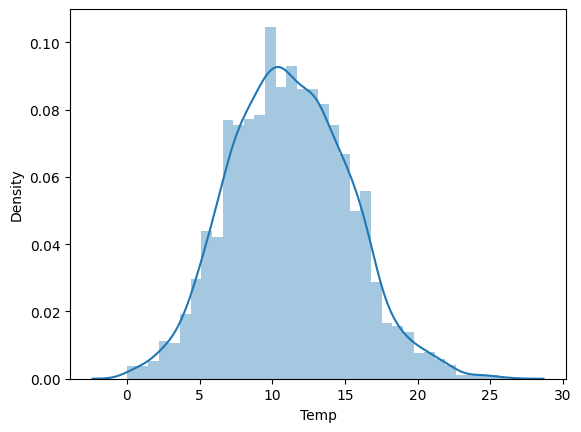

In [8]:
#DATA VISUALIZATION (missing values ny visualizing the graphs BY SEA BORN LIBRARY)
sns.distplot(df['Temp'])

<ipython-input-9-b71a1d9f50a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temp'],kde=False,bins=10)


<Axes: xlabel='Temp'>

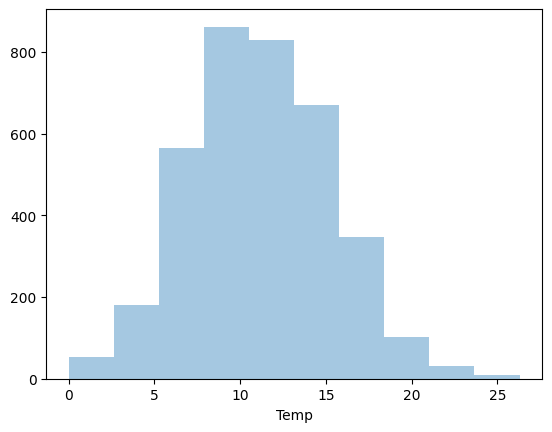

In [9]:
#FROM THE GRAPH THE RANGE OF HIHEST TEMPATURE ARE BETWEEN 8 TO 18
sns.distplot(df['Temp'],kde=False,bins=10)

<Axes: xlabel='Temp'>

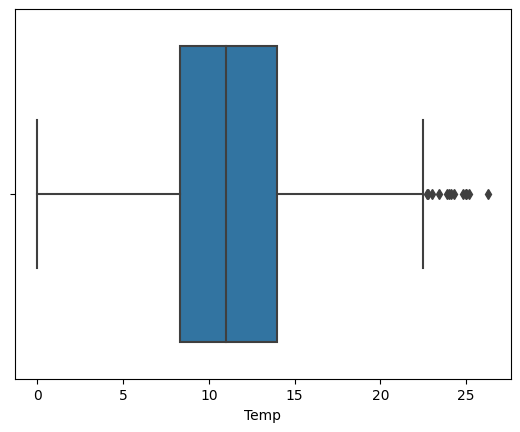

In [10]:
#D.v for OUTLINERS
sns.boxplot(x='Temp',data=df)

In [11]:
#REMOVING OF OUTLINERS
max_Temp=df['Temp'].quantile(0.990)

<Axes: xlabel='Temp'>

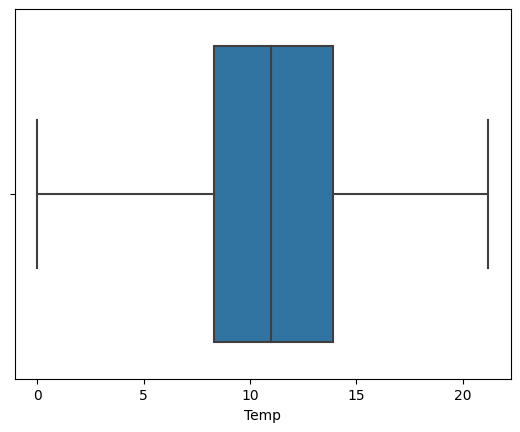

In [13]:
df=df[df['Temp']<max_Temp]
sns.boxplot(x='Temp',data=df)

<Axes: xlabel='Temp'>

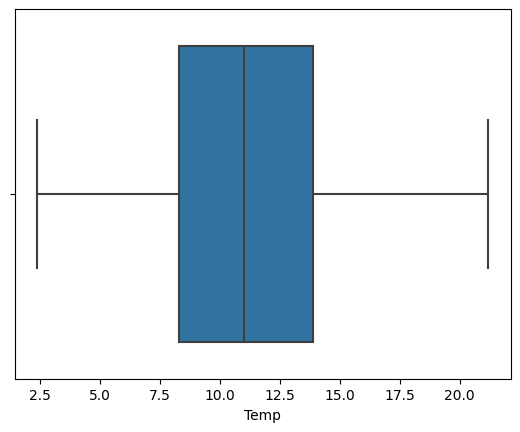

In [14]:
#REMOVING OF zeros
min_Temp=df['Temp'].quantile(0.010)
df=df[df['Temp']>min_Temp]
sns.boxplot(x='Temp',data=df)

<Axes: title={'center': 'Sationary data'}, xlabel='Date'>

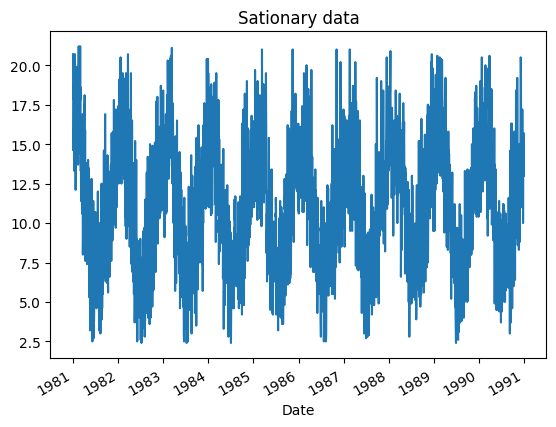

In [15]:
#from the visualization of graph we can see data is sationary
df['Temp'].plot(title="Sationary data")

In [16]:
#To check whether data is sationary or not by DICKEW FULLER TEST
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print(" Data has no unit root and is stationary")
    else:
        print(" Data hasa unit root, indicating it is non-stationary ")

In [19]:
#FROM BELOW P-VALUE IS LESS SIGINFICANCE VALUE(P<0.05),SIGINFICANCE LEVEL =0.05,SO THE DATA IS
#sationary
adf_test(df['Temp'])

ADF Statistics: -4.346870383940185
p- value: 0.00036813269092970914
 Data has no unit root and is stationary


In [20]:
!pip install arch yfinance pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.7 MB/s eta 0:00:00


In [21]:
from pmdarima import auto_arima

In [22]:
stepwise_fit = auto_arima(df['Temp'], start_p=1, start_q=1,
                           max_p=1, max_q=1, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=25.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=19533.366, Time=0.86 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=18437.782, Time=2.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.87 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=19381.500, Time=0.36 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=18004.372, Time=4.72 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=20.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=11.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=18141.332, Time=1.98 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=17140.653, Time=6.70 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=17558.378, Time=5.62 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=33.01 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=19.41 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=17708.775, Time=5.68 sec
 ARIMA(1,1,1)(2,1,0)[12] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 3573
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -8565.326
Date:                             Fri, 07 Jul 2023   AIC                          17140.653
Time:                                     14:25:54   BIC                          17171.541
Sample:                                          0   HQIC                         17151.667
                                            - 3573                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4571      0.016     28.562      0.000       0.426       0.488
ma.L1         -0.9658      0.005   -202.008      0.000      -0.975      -0.956
ar.S.L12      -0.6480      0.016    -40.916      0.000      -0.679      -0.617
ar.S.L24      -0.3386      0.016    -21.089      0.000      -0.370      -0.307
sigma2         7.1824      0.169     42.507      0.000       6.851       7.514
===================================================================================
Ljung-Box (L1) (Q):                   7.79   Jarque-Bera (JB):                 5.13
Prob(Q):                              0.01   Prob(JB):                         0.08
Heteroskedasticity (H):               0.85   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
#The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.
print(stepwise_fit.aic())

17140.652972373915


In [ ]:
#prediction for Next 6 YEARS

In [24]:
train=df.iloc[:3285]
test=df.iloc[3285:]
test

,Temp
Date,
1990-03-18,15.1
1990-03-19,15.0
1990-03-20,13.6
1990-03-21,12.5
1990-03-22,14.3
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [ ]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
model=ARIMA(train,order=(1,1,1))
results=model.fit()
results.summary

In [ ]:
#to obtain predicted values
predictions=results.predict(start=len(train),end=len(df),type='levels')

In [ ]:
#compare predicted to expected values
for i in range(len(predictions)):
  print(f"predicted={predictions[i]},expected={test{'Temp'}{i}}")

In [ ]:
#predicted vs observed (test data)
test['temp'].plot(legend=true)
predictions.rename('arima(1,1.1)predictions').plot(legend=true)

In [ ]:
from sklearn.metrics import mean_squred_error
MSE=mean_squred_error(test['temp'].predictions)
print('ARIMA(1,1,1)MSE error:',MSE)

In [ ]:
forecast=results.predict(start=len(df).end=len(df)+10*10)

In [ ]:
df['Temp'].plot(legend=True)
forecast.rename(ARIMA(1,1,1)forecast').plot(legend=True)